# Analisis encuestas Coomproriente

In [70]:
# Importacion de las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importacion de la Data

### Comerciante
Perfil: Comerciante

| Código | Tipo | Pregunta | Respuestas / Escala |
|--------|------|----------|---------------------|
| M1 | Demográfica | ¿Cuánto tiempo llevas operando en el Centro de Abastos? | 1=<1 año, 2=1–3 años, 3=3–5 años, 4=>5 años |
| M2 | Cerrada | ¿Conoces la página de Coomproriente con los reportes de precios? | 1=Sí, 2=No |
| M3 | Cerrada | Si "Sí" en M2: ¿Con qué fin principal la usas? | a) Ver precios b) Comparar proveedores c) Historial |
| M4 | Likert | ¿Qué tan actualizada está la información de precios y stock en ese reporte? | 1=Muy desactualizada → 5=Muy actualizada |
| M5 | Cerrada | ¿Has tenido que contactar por otro medio para confirmar o corregir precios? | 1=Sí, frecuentemente 2=Sí, ocasionalmente 3=No |
| M6 | Likert | Para tu negocio, ¿qué tan relevante sería un sistema de pedidos y facturación integrado en la web? | 1=Muy irrelevante → 5=Muy relevante |
| M7 | Cerrada | ¿Estarías dispuesto(a) a pagar una suscripción o comisión por usar un e-commerce que te ahorre tiempo? | 1=Sí, 2=No |
| M8 | Abierta | ¿Qué otros servicios (alertas de variación de precio, reportes descargables, facturación automática) te gustaría tener? | Respuesta libre |

In [71]:
df_com = pd.read_csv('../respuestas-cuestionario-comerciante.csv', quotechar='"', skipinitialspace=True, engine='python')

# Separar la columna combinada
df_com = df_com.iloc[:, 0].str.extract(
    r'^([^,]+),(\d|-),(\d|-),([abc-]),(\d|-),(\d|-),(\d|-),(\d|-),"?(.*?)"?$'
)
df_com.columns = ['Nombre', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'Comentario']

# Convertir las columnas numéricas
cols = ['M1', 'M2', 'M4', 'M5', 'M6', 'M7']
df_com[cols] = df_com[cols].replace('-', pd.NA).apply(pd.to_numeric)

df_com.head()

,Nombre,M1,M2,M3,M4,M5,M6,M7,Comentario
0,Marta Díaz,2,1,a,4.0,2,5,1,Alertas de variación de precios para productos...
1,Juan Pérez,3,2,-,NaN,1,4,1,Reportes descargables en formatos Excel o PDF.
2,Camila Rodríguez,4,1,b,5.0,1,5,1,Facturación automática y gestión de inventario.
3,Andrés Gómez,1,2,-,NaN,2,3,2,Integración con sistemas contables existentes.
4,Carolina López,2,1,a,3.0,2,4,1,Soporte en línea para resolver dudas rápidamente.


In [72]:
df_com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Nombre      48 non-null     object 
 1   M1          48 non-null     int64  
 2   M2          48 non-null     int64  
 3   M3          48 non-null     object 
 4   M4          28 non-null     float64
 5   M5          48 non-null     int64  
 6   M6          48 non-null     int64  
 7   M7          48 non-null     int64  
 8   Comentario  48 non-null     object 
dtypes: float64(1), int64(5), object(3)
memory usage: 3.5+ KB


In [73]:
M1_dict={1:'<1 año', 2:'1–3 años', 3:'3–5 años', 4:'4:5 años'}
M2_dict={1:'sí', 2:'no'}
df_com['M1']=df_com['M1'].map(M1_dict)
df_com['M2']=df_com['M2'].map(M2_dict)

#### M1.Visualizacion de estancia en la empresa

Text(0.5, 1.0, 'Tiempo de vinculacion de Comerciantes con la empresa')

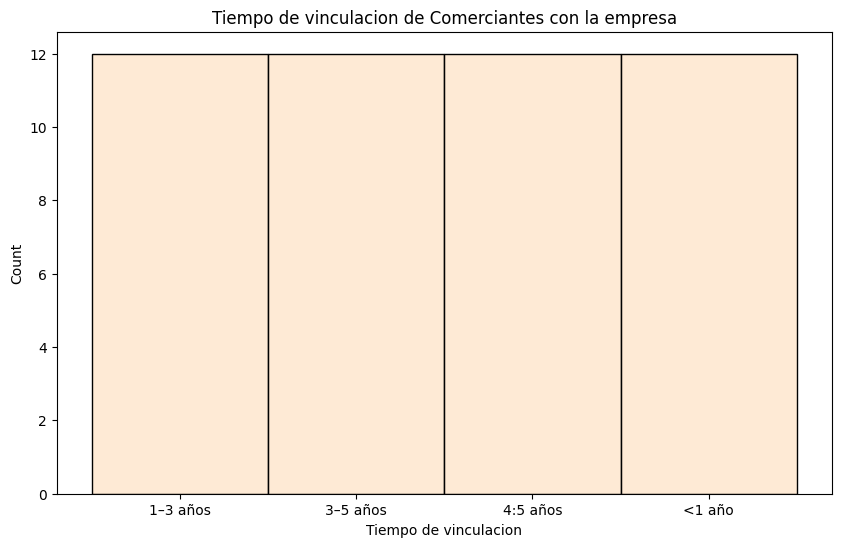

In [74]:

plt.figure(figsize=(10, 6))
sns.histplot(df_com['M1'].dropna(), bins=10)
plt.xlabel('Tiempo de vinculacion')
plt.title('Tiempo de vinculacion de Comerciantes con la empresa')

Text(0.5, 1.0, 'Tiempo de vinculacion de Comerciantes con la empresa')

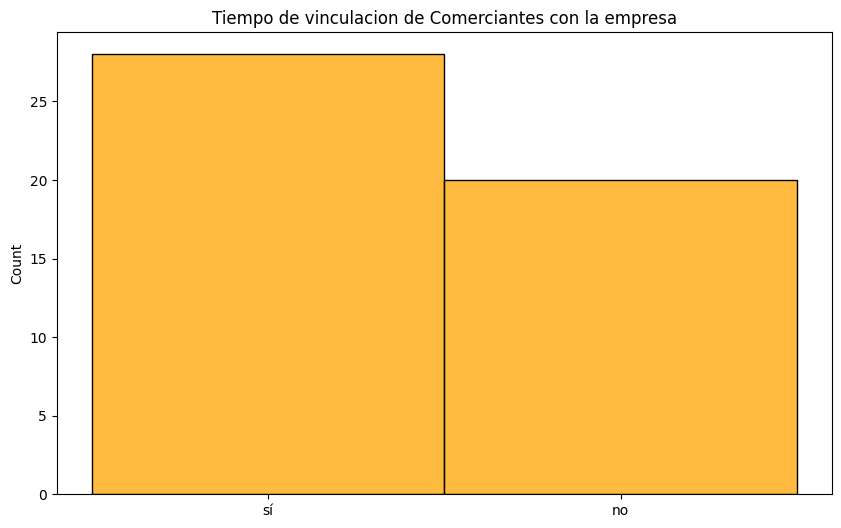

In [75]:
# Conocimiento con la empresa

plt.figure(figsize=(10, 6))
sns.histplot(df_com['M2'].dropna(), bins=10,color='orange')
plt.xlabel('')
plt.title('Tiempo de vinculacion de Comerciantes con la empresa')

In [76]:
# Seleccion de opiniones de la gente que conoce la pagina

df_com_vd=df_com[df_com['M2']=='sí']
df_com_vd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, 0 to 47
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Nombre      28 non-null     object 
 1   M1          28 non-null     object 
 2   M2          28 non-null     object 
 3   M3          28 non-null     object 
 4   M4          28 non-null     float64
 5   M5          28 non-null     int64  
 6   M6          28 non-null     int64  
 7   M7          28 non-null     int64  
 8   Comentario  28 non-null     object 
dtypes: float64(1), int64(3), object(5)
memory usage: 2.2+ KB


#### M3. Para que la usan

In [77]:
M3_dict={'a':'Ver Precios', 'b':'Comparar Proovedores', 'c':'Historial'}
df_com_vd['M3']=df_com_vd['M3'].map(M3_dict)

C:\Users\equipo\AppData\Local\Temp\ipykernel_3264\1841188507.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_com_vd['M3']=df_com_vd['M3'].map(M3_dict)


In [78]:
df_com_vd['M3'].value_counts()

M3
Ver Precios             10
Comparar Proovedores     9
Historial                9
Name: count, dtype: int64

C:\Users\equipo\AppData\Local\Temp\ipykernel_3264\2050820360.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_com_vd['M3'].dropna(), bins=10, palette='')


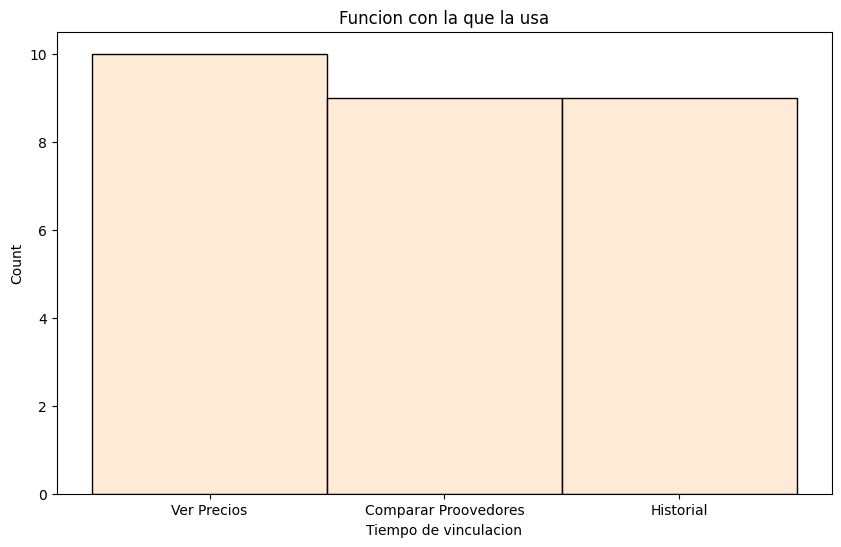

In [79]:
plt.figure(figsize=(10, 6))
sns.histplot(df_com_vd['M3'].dropna(), bins=10, palette='')
plt.xlabel('Tiempo de vinculacion')
plt.title('Funcion con la que la usa')
sns.set_palette("Blues")

#### M4. ¿Que tan actualizada esta la pagina?

In [80]:
M4_dict={1:'Muy desactualizada', 2:'Desactualizada', 3:'Normal', 4:'Actualizada',5:'Muy actualizada'}
df_com_vd['M4']=df_com_vd['M4'].map(M4_dict)
df_com_vd['M4'].value_counts()

C:\Users\equipo\AppData\Local\Temp\ipykernel_3264\1745572958.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_com_vd['M4']=df_com_vd['M4'].map(M4_dict)


M4
Actualizada        10
Muy actualizada     9
Normal              9
Name: count, dtype: int64

C:\Users\equipo\AppData\Local\Temp\ipykernel_3264\4262514938.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_com_vd['M4'].dropna(), bins=10, palette='')


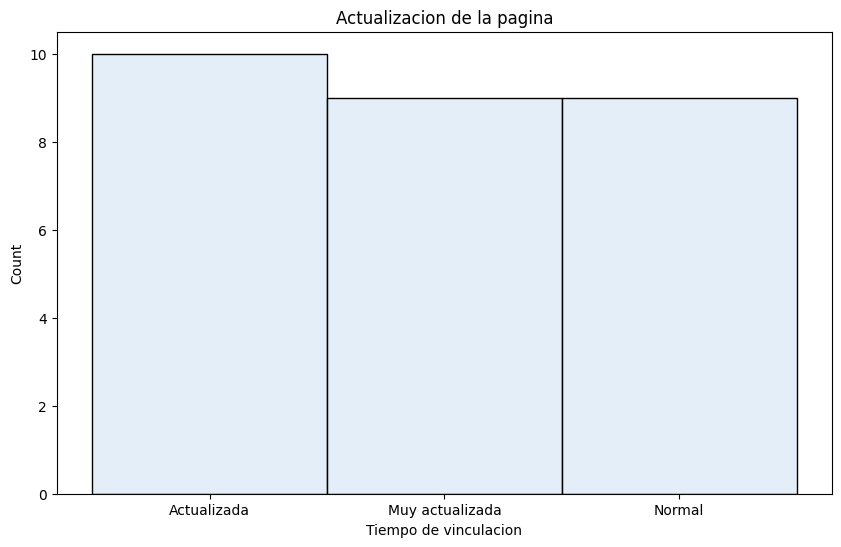

In [81]:
plt.figure(figsize=(10, 6))
sns.histplot(df_com_vd['M4'].dropna(), bins=10, palette='')
plt.xlabel('Tiempo de vinculacion')
plt.title('Actualizacion de la pagina')
sns.set_palette("Oranges")

#### M5. Contactar otro medio para confirmar o corregir precios

In [82]:
M5_dict={1:'si,frecuentemente',2:'si,ocasionalmente',3:'no'}
df_com_vd['M5']=df_com_vd['M5'].map(M5_dict)

C:\Users\equipo\AppData\Local\Temp\ipykernel_3264\418583671.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_com_vd['M5']=df_com_vd['M5'].map(M5_dict)


In [83]:
df_com_vd['M5'].value_counts()

M5
si,frecuentemente    17
si,ocasionalmente    11
Name: count, dtype: int64

C:\Users\equipo\AppData\Local\Temp\ipykernel_3264\2127697061.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_com_vd['M5'].dropna(), bins=10, palette='')


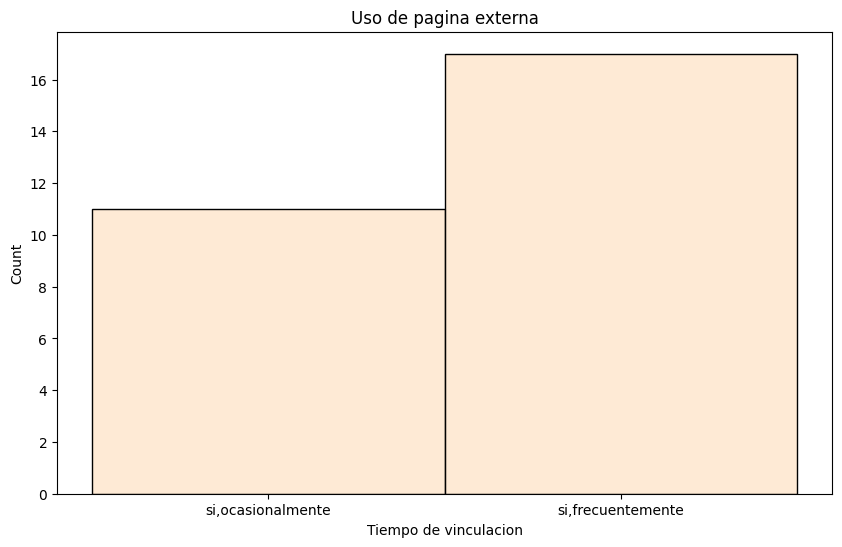

In [84]:
plt.figure(figsize=(10, 6))
sns.histplot(df_com_vd['M5'].dropna(), bins=10, palette='')
plt.xlabel('Tiempo de vinculacion')
plt.title('Uso de pagina externa')
sns.set_palette("Oranges")

#### Relevancia de un sistema de pedidos


In [85]:
M6_dict={1:'Muy irrelevante',2:'irrelevante',3:'Normal',4:'relevante',5:'muy relevante'}
df_com_vd['M6']=df_com_vd['M6'].map(M6_dict)
df_com_vd['M6'].value_counts()

C:\Users\equipo\AppData\Local\Temp\ipykernel_3264\2502702462.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_com_vd['M6']=df_com_vd['M6'].map(M6_dict)


M6
muy relevante    20
relevante         6
Normal            2
Name: count, dtype: int64

C:\Users\equipo\AppData\Local\Temp\ipykernel_3264\2440340045.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_com_vd['M6'].dropna(), bins=10, palette="coolwarm")


Text(0.5, 1.0, 'Importancia sistema de pedididos para comerciantes')

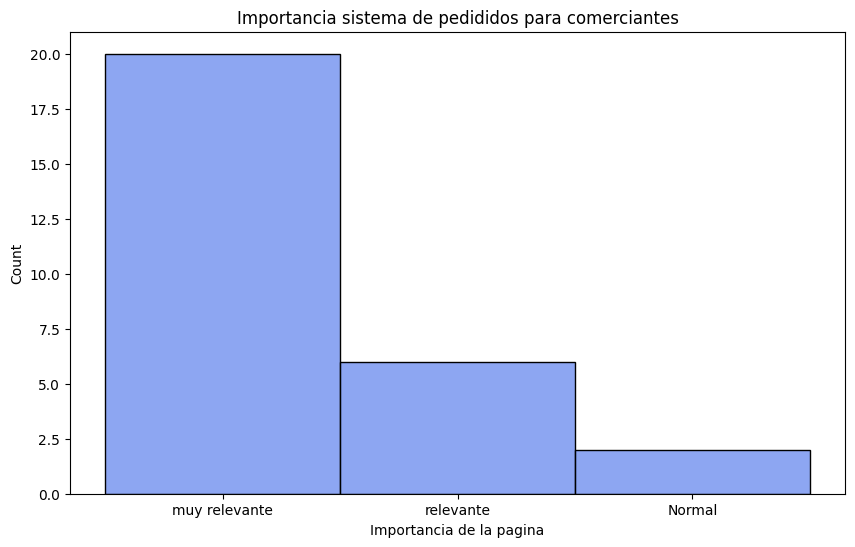

In [93]:
plt.figure(figsize=(10, 6))
sns.histplot(df_com_vd['M6'].dropna(), bins=10, palette="coolwarm")
plt.xlabel('Importancia de la pagina')
plt.title('Importancia sistema de pedididos para comerciantes')


#### Disposicion a pagar una suscripcion

In [94]:
M7_dict={1:'si',2:'no'}
df_com_vd['M7']=df_com_vd['M7'].map(M7_dict)
df_com_vd['M7'].value_counts()

C:\Users\equipo\AppData\Local\Temp\ipykernel_3264\509785103.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_com_vd['M7']=df_com_vd['M7'].map(M7_dict)


M7
si    26
no     2
Name: count, dtype: int64

C:\Users\equipo\AppData\Local\Temp\ipykernel_3264\2994411192.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_com_vd['M7'].dropna(), bins=10, palette="coolwarm")


Text(0.5, 1.0, 'Postura de pago de suscripcion para comerciantes')

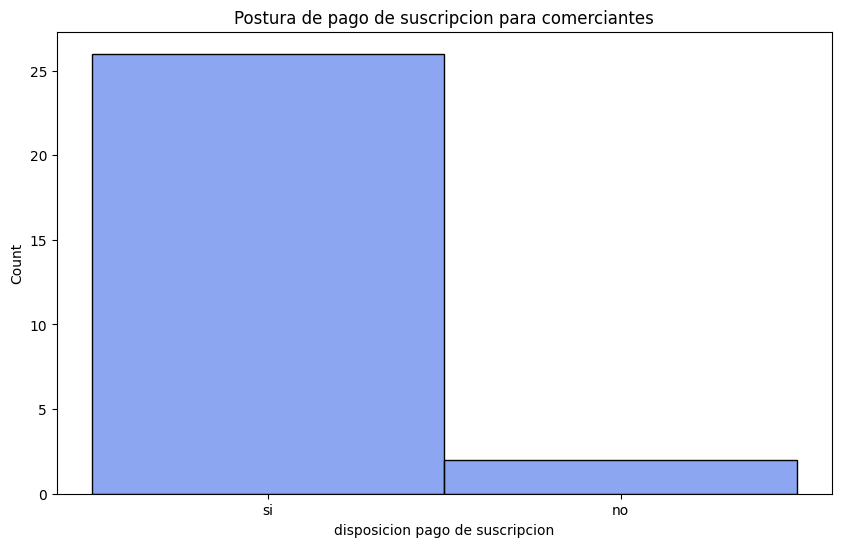

In [98]:
plt.figure(figsize=(10, 6))
sns.histplot(df_com_vd['M7'].dropna(), bins=10, palette="coolwarm")
plt.xlabel('disposicion pago de suscripcion')
plt.title('Postura de pago de suscripcion para comerciantes')

#### ¿Que otros servicios les gustaria que tuviera la pagina?

In [102]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\equipo\AppData\Local\Temp\ipykernel_3264\1508090291.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_words, x='count', y='word', palette='mako')


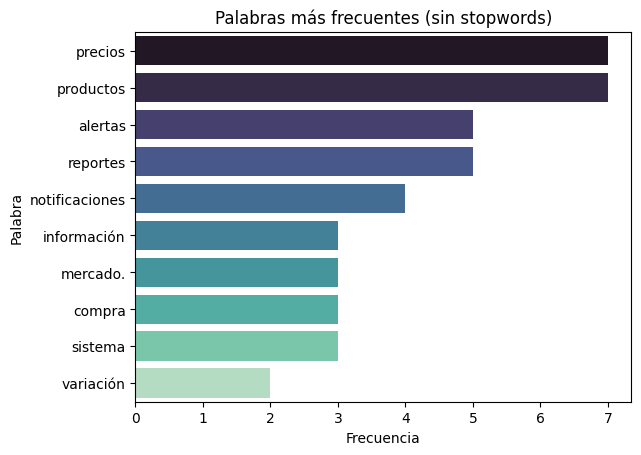

In [103]:
from nltk.corpus import stopwords
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Texto de tu columna
text = ' '.join(df_com_vd['Comentario']).lower()

# Lista de stopwords en español
stop_words = set(stopwords.words('spanish'))

# Filtrar palabras
words = [word for word in text.split() if word not in stop_words]

# Contar frecuencia
counts = Counter(words)
top_words = pd.DataFrame(counts.most_common(10), columns=['word', 'count'])

# Gráfico
sns.barplot(data=top_words, x='count', y='word', palette='mako')
plt.title("Palabras más frecuentes (sin stopwords)")
plt.xlabel("Frecuencia")
plt.ylabel("Palabra")
plt.show()


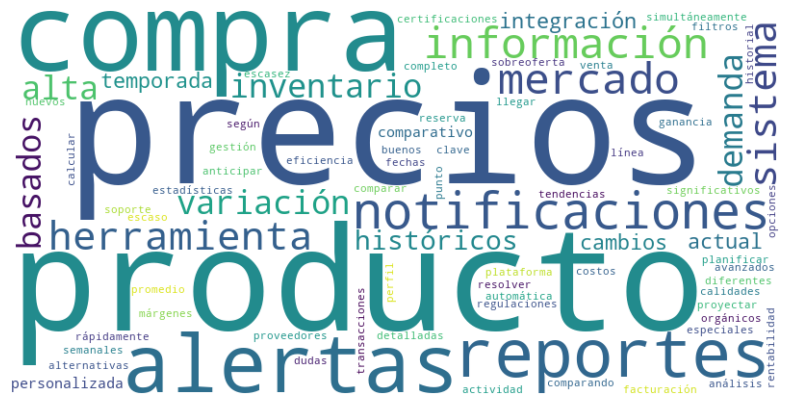

In [104]:
from nltk.corpus import stopwords
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Texto de tu columna
text = ' '.join(df_com_vd['Comentario']).lower()

# Lista de stopwords en español
stop_words = set(stopwords.words('spanish'))

# Filtrar palabras
words = [word for word in text.split() if word not in stop_words]

# Contar frecuencia
counts = Counter(words)
top_words = pd.DataFrame(counts.most_common(10), columns=['word', 'count'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

